# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee = pd.read_csv('Employee.csv')

In [3]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [4]:
employee.columns

Index(['Name', 'Department', 'Education', 'Gender', 'Title', 'Years',
       'Salary'],
      dtype='object')

#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
# your answer here-1st way
mean_salary_by_dept = employee.groupby('Department')['Salary'].mean()

print(mean_salary_by_dept)

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64


In [6]:
# your answer here-2nd way
pivot_table = pd.pivot_table(employee, values='Salary', index='Department', aggfunc='mean')

print(pivot_table)

            Salary
Department        
HR           45.00
IT           48.75
Sales        55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [7]:
# your answer here
pivot_salary = pd.pivot_table(employee, values='Salary', index=['Department', 'Title'], aggfunc='mean')

print(pivot_salary)

                      Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [8]:
# your answer here
pivot_years = pd.pivot_table(employee, values=['Salary', 'Years'], index='Title', aggfunc='mean')

print(pivot_years)

              Salary  Years
Title                      
VP         70.000000   8.00
analyst    32.500000   2.25
associate  56.666667   4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [9]:
# your answer here
pivot_table = pd.pivot_table(employee, values='Salary', index=['Department', 'Title'], aggfunc=[np.mean, len])

print(pivot_table)

                       mean    len
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [10]:
# your answer here
pivot_table = pd.pivot_table(employee, values='Salary', index=['Department', 'Title'], aggfunc=[np.median, np.min, np.max, np.std])

print(pivot_table)

                     median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000


#### Based on your comments, fill the missing values with an appropriate value

In [11]:
# your answer here
mean_table = pivot_table.fillna(value=pivot_table.mean())

print(mean_table)

                     median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  2.357023
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  2.357023
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  2.357023
Sales      associate   55.0     55     55  0.000000


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [12]:
# your answer here
pivot_table = pd.pivot_table(employee, values='Salary', index='Department', aggfunc=[len, sum])

# Rename the columns
pivot_table.columns = ['Number of Employees', 'Total Salary Expenditure']

print(pivot_table)

            Number of Employees  Total Salary Expenditure
Department                                               
HR                            3                       135
IT                            4                       195
Sales                         2                       110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [13]:
# your answer here

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [14]:
# your answer here--Your custom function here
pivot_table = pd.pivot_table(employee, values=['Years', 'Salary'], index=['Department', 'Title'], aggfunc={'Years': sum, 'Salary': 'mean'})

# Rename the columns
pivot_table.columns = ['Total Years of Work Experience', 'Mean Salary']

print(pivot_table)

                      Total Years of Work Experience  Mean Salary
Department Title                                                 
HR         VP                                   70.0            8
           analyst                              32.5            6
IT         VP                                   70.0            8
           analyst                              32.5            3
           associate                            60.0            7
Sales      associate                            55.0            5


In [15]:
# your answer here
def custom_agg(df):
    total_years = df['Years'].sum()
    mean_salary = df['Salary'].mean()
    return pd.Series([total_years, mean_salary], index=['Total Years of Work Experience', 'Mean Salary'])

pivot_table = employee.groupby(['Department', 'Title']).apply(custom_agg)

print(pivot_table)

                      Total Years of Work Experience  Mean Salary
Department Title                                                 
HR         VP                                    8.0         70.0
           analyst                               6.0         32.5
IT         VP                                    8.0         70.0
           analyst                               3.0         32.5
           associate                             7.0         60.0
Sales      associate                             5.0         55.0


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [16]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [17]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [18]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [19]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

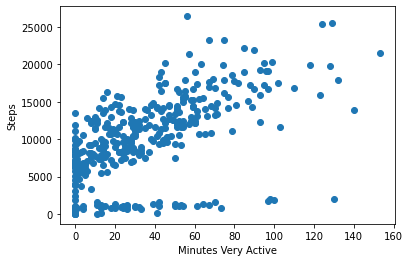

In [20]:
# your answer here
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [21]:
# your comment here
# A correlation of 0.5714 indicates a kind of positive relationship between the Minutes Very Active and Steps columns in the fitbit dataframe.
# This means that as the number of minutes very active increases, the number of steps taken also tends to increase a little bit.
# This doesn't not mean causation...

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [22]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990094

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

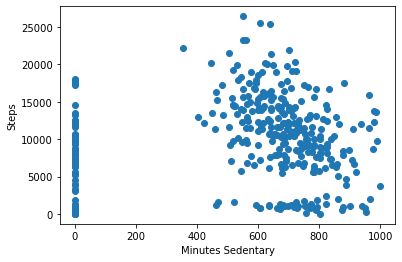

In [23]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [24]:
# Your comment here
# There's a weak correlation between this two variables

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [25]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836386

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

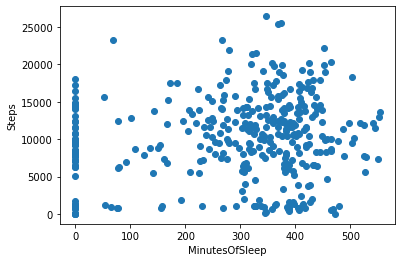

In [26]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [27]:
# your answer here
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

subset_fitbit = fitbit[columns]

cor_fit = subset_fitbit.corr()

In [28]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [38]:
# your answer here
cor_steps = cor_fit['Steps'].sort_values(ascending=False)
cor_steps

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [40]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [42]:
#Print time_grades
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

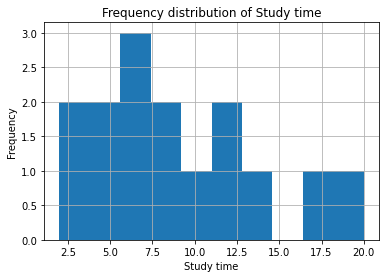

In [45]:
# your answer here
time_grades['Study time'].hist()

plt.title('Frequency distribution of Study time')
plt.xlabel('Study time')
plt.ylabel('Frequency')

plt.show()

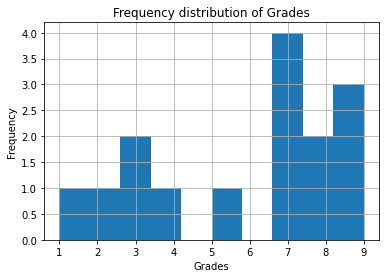

In [48]:
time_grades['Grade'].hist()

plt.title('Frequency distribution of Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')

plt.show()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [50]:
# your answer here-Pearson 
pearson_corr = time_grades['Study time'].corr(time_grades['Grade'], method='pearson')
print(f"Pearson correlation coefficient: {pearson_corr}")

Pearson correlation coefficient: 0.7980456073578857


In [52]:
## your answer here-Spearman
spearman_corr = time_grades['Study time'].corr(time_grades['Grade'], method='spearman')
print(f"Spearman correlation coefficient: {spearman_corr}")

Spearman correlation coefficient: 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

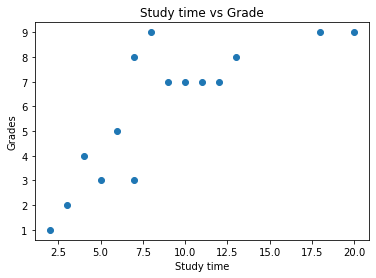

In [54]:
# your answer here
plt.scatter(time_grades['Study time'], time_grades['Grade'])

plt.title('Study time vs Grade')
plt.xlabel('Study time')
plt.ylabel('Grades')

plt.show()

In [36]:
#your comment here theres a strong correlation between those variables

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [37]:
#your comment here
# the Pearson correlation coefficient measures the linear relationship between two variables assuming normal distribution and linearity
# the Spearman correlation coefficient measures the relationship between two variables without any distributional assumptions and is more robust 